[개념정리]
================
분류
- 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

앙상블 : 배깅, 부스팅

결정 트리 (Decision Tree)
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
- 규칙 노드 (Decision Node) : 규칙 조건 / 리프 노드 (Leaf Node) : 결정된 클래스 값
- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음            -> 트리를 어떻게 분할(split)할지 !
- 결정 노드 : 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦

정보 균일도를 측정하는 방법 : 엔트로피를 이용한 정보 이득 (information gain) , 지니 계수
- 정보 이득
  - 정보 이득 지수 : 1 - 엔트로피지수
  - 정보 이득이 높은 속성으로 기준 분할
- 지니 계수
  - 0이 가장 평등 , 1로 갈수록 불평등
  - 지니 계수가 낮을수록 데이터의 균일도가 높음
  - 지니 계수가 낮은 속성을 기준으로 분할


    결정 트리 모델의 특징

    장점
    쉽다, 직관적이다
    피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음

    단점
    과적합으로 알고리즘 성능이 떨어진다.
    이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요


결정 트리 파라미터
- DecisionTreeClassifier 클래스 : 분류
- DecisionTreeRegressor 클래스 : 회귀
  - min_samples_split / min_samples_leaf / max_features / max_depth / max_leaf_nodes

결정 트리 모델의 시각화
- Graphviz 패키지의 export_graphviz() API 이용하기
- 그래프 형태로 시각화할 수 있는 출력 파일 생성

앙상블 학습의 유형 : 보팅 , 배깅 , 부스팅 ...
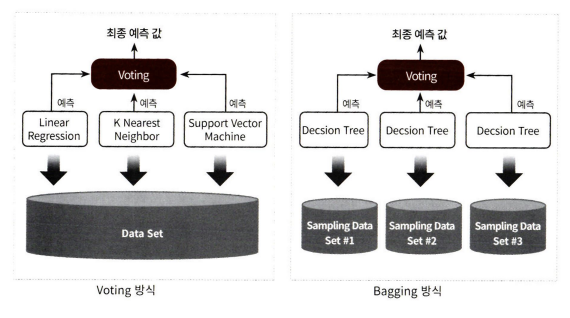

보팅 유형 : 하드 보팅, 소프트 보팅
- 하드 보팅 : 다수결 원칙과 유사
- 소프트 보팅 : 평균내서 가장 높은 확률의 레이블 값을 최종 보팅 결괏값으로 선정
- 일반적으로 소프트 보팅의 예측 성능이 좋아서 더 많이 사용됨

보팅 분류기
- VotingClassifier 클래스 제공


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#붓꽃 데이터 로딩, 학습/테스트 데이터 세트로 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz

#export_graphviz의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

In [ ]:
import graphviz

#위에서 생성된 tree.dot 파일 Graphviz가 읽어서 주피터 노트북상에서 시각화

with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

- max_depth 하이퍼 파라미터 변경 : 결정 트리의 최대 트리 깊이를 제어
- min_samples_split 하이퍼 파라미터 변경 : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
- min_samples_leaf 하이퍼 파라미터 변경 : 더이상 자식 노드가 없어서 클래스 결정값이 되는 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값


feature_importances_
- 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 제공함
- ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됨
- 값이 높을수록 해당 피처의 중요도가 높음


In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

#feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importance 를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [ ]:
# make_classification() 함수 : 분류를 위한 테스트용 데이터를 쉽게 만들 수 있음

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features sample data creation')

#2차원 시각화 위해 피처 2개, 클래스 3개 유형의 분류 샘플 데이터 생성
X_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [ ]:
import numpy as np

### Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
  fig,ax = plt.subplots()
  
  # 학습 데이터를 scatter plot으로 나타내기
  ax.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = 'rainbow', edgecolor = 'k',
             clim = (y.min(), y.max()), zorder = 3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()
    
  # 호출 파라미터로 들어온 train 데이터로 model 학습
  model.fit(X, y)
  
  # meshgrid 형태인 모든 좌표값으로 예측 수행
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200),
                       np.linspace(ylim_start, ylim_end, num = 200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  
  # contourf()를 이용하여 class boundary를 visualization
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                         levels = np.arange(n_classes + 1) - 0.5,
                         cmap = 'rainbow', clim = (y.min(), y.max()),
                         zorder = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#특정 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 일부 이상치(outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌음
- 결정 기준 경계가 많아지고 복잡해짐 -> 예측 정확도가 떨어짐

In [ ]:
# min_samples_lear=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 이상치에 크게 반응하지 않아서 좀 더 일반화된 분류 규칙에 따라 분류됨

In [ ]:
# pg.211

# pg.215
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

In [ ]:
# 로지스틱 회귀와 KNN을 기반으로 해서 소프트 보팅 방식으로 새롭게 보팅 분류기 만들기

# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

- ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가요소가 됨
- 앙상블 학습은 결정 트리의 알고리즘의 단점을 매우 많음 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복함
  - 즉, 결정 트리 알고리즘의 장점은 그대로 취하고 , 단점 보완해서 편향-분산 트레이드오프의 효과를 극대화함


pg. 217 : 랜덤 포레스트
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정
- 부트스트래핑 분할 방식 : 여러 개의 데이터 세트를 중첩되게 분리하는 것


In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('/content/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('/content/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('/content/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('/content/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

pg.219 : 랜덤 포레스트 하이퍼 파라미터 및 튜닝
- n_estimators / max_features / max_depth / min_samples_leaf
- GridSearchCV 이용해서 랜덤 포레스트의 하이퍼 파라미터 튜닝 가능

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행 (n_jobs=-1: 모든 CPU 코어를 이용해 학습)
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# n_estimators를 300으로 증가시킨 다음에 다시 학습하기

rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

pg.222 : GBM (gradient boosting machine)
부스팅 알고리즘 : 여러 개의 약한 학습기를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 대표적 예 : 에이다 부스트 / 그래디언트 부스트

에이다 부스트
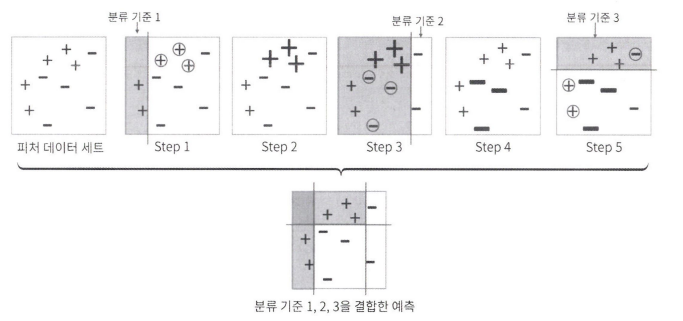

그래디언트 부스트
- 가중치 업데이트를 경사 하강법 (Gradient Descent)을 이용함
- 오류 값은 실제 값 - 예측값
- 오류식 h(x) = y - F(x) 를 최소화하는 방향성을 가지고 반복적으로 가중치를 업데이트 하는 방식

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

pg.225 : GBM 하이퍼 파라미터 및 튜닝
- loss : 경사하강법에서 사용할 비용 함수 지정
- learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률
- n_estimators : weaker learner의 개수
- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율


GridSearchCV 이용해서 하이퍼 파라미터 최적화 가능

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))